# Markers for Region Growing

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from skimage.io import imread,imsave

(800, 1200, 3)


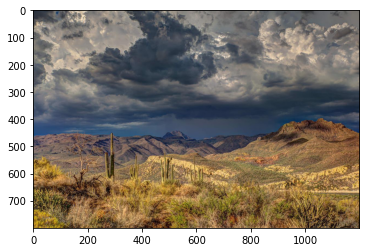

In [2]:
im = imread('desert.jpg')
print(im.shape)

plt.figure()
plt.imshow(im)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  This is separate from the ipykernel package so we can avoid doing imports until


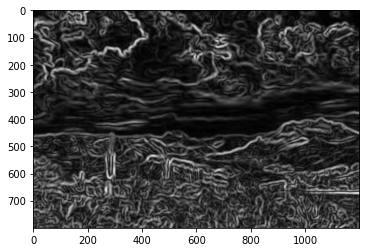

In [3]:
from skimage.filters import sobel,gaussian

im_ = gaussian(im, sigma=4)
br = sobel(im_[:,:,0])
bg = sobel(im_[:,:,1])
bb = sobel(im_[:,:,2])
brgb = br+bg+bb

plt.figure()
plt.imshow(brgb, cmap=plt.cm.gray)
plt.show()

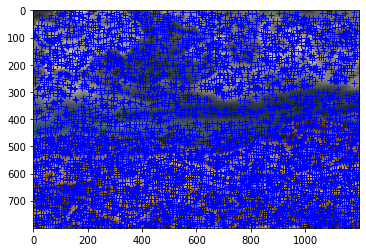

In [4]:
from skimage.feature import peak_local_max

markers = peak_local_max(brgb.max()-brgb)
plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

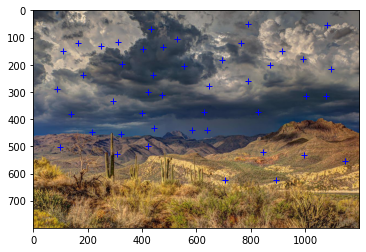

In [5]:
markers = peak_local_max(brgb.max()-brgb, threshold_rel=0.99, min_distance=50)

plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


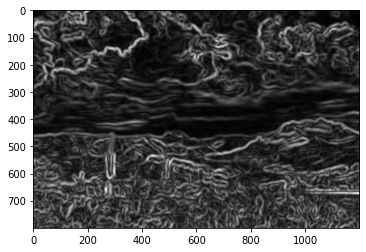

In [6]:
from skimage.filters import rank
from skimage.morphology import disk

im_ = gaussian(im, sigma=4)
gradr = rank.gradient(im_[:,:,0],disk(3)).astype('int')
gradg = rank.gradient(im_[:,:,1],disk(3)).astype('int')
gradb = rank.gradient(im_[:,:,2],disk(3)).astype('int')
grad = gradr+gradg+gradb

plt.figure()
plt.imshow(grad, cmap=plt.cm.gray)
plt.show()

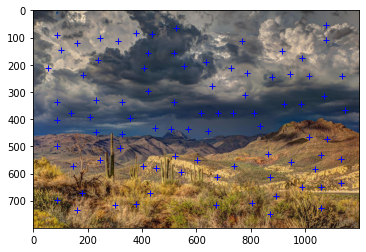

In [7]:
markers = peak_local_max(grad.max()-grad, threshold_rel=0.95, min_distance=50)

plt.figure()
plt.imshow(im)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

# Region Growing with the Watershed Transform

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':


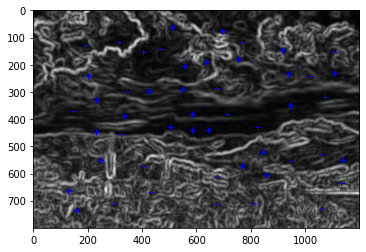

In [8]:
from skimage.filters import rank,gaussian
from skimage.morphology import disk
from skimage.feature import peak_local_max

def get_markers(im, indices=False):
    im_ = gaussian(im, sigma=4)
    gradr = rank.gradient(im_[:,:,0],disk(5)).astype('int')
    gradg = rank.gradient(im_[:,:,1],disk(5)).astype('int')
    gradb = rank.gradient(im_[:,:,2],disk(5)).astype('int')
    grad = gradr+gradg+gradb
    
    return peak_local_max(grad.max()-grad,threshold_rel=0.5, min_distance=60,indices=indices),grad

markers,grad = get_markers(im, True)
plt.figure()
plt.imshow(grad, cmap=plt.cm.gray)
plt.plot(markers[:,1],markers[:,0],'b+')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.

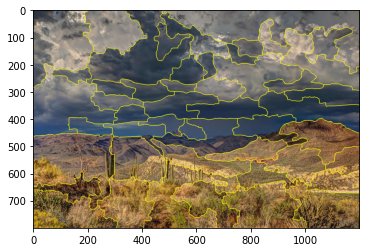

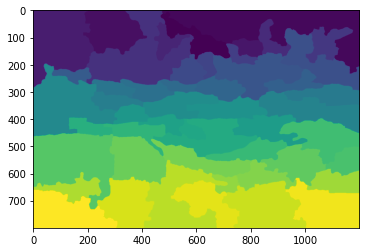

In [9]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
from skimage.measure import label

markers, grad = get_markers(im, False)
markers = label(markers)
ws = watershed(grad, markers)

plt.figure()
plt.imshow(mark_boundaries(im,ws))
plt.figure()
plt.imshow(ws)
plt.show()

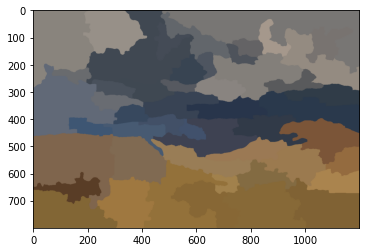

In [10]:
def get_descr(region):
    return [region[:,0].mean(), region[:,1].mean(), region[:,2].mean()]

descriptors = np.zeros((ws.max()+1,3))
im_descriptors = np.zeros_like(im)

for i in range(ws.min(),ws.max()+1):
    descriptors[i] = get_descr(im[ws==i])
    im_descriptors[ws==i] = descriptors[i]
    
plt.figure()
plt.imshow(im_descriptors)
plt.show()

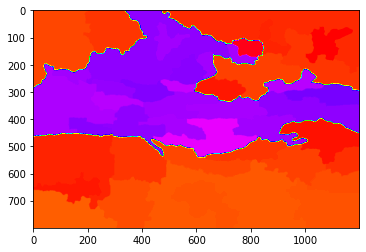

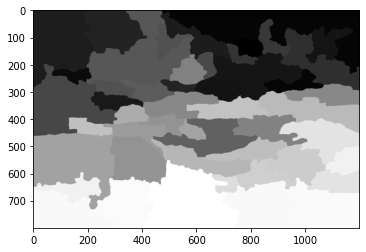

In [11]:
from skimage.color import rgb2hsv

hsv = rgb2hsv(im_descriptors)

plt.figure()
plt.imshow(hsv[:,:,0], cmap=plt.cm.hsv)
plt.figure()
plt.imshow(hsv[:,:,1], cmap=plt.cm.gray)
plt.show()

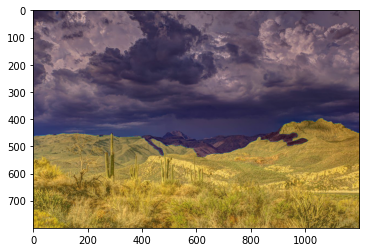

In [12]:
mask = (hsv[:,:,0]<0.15)*(hsv[:,:,1]>0.3)

plt.figure()
plt.imshow(im)
plt.imshow(mask, alpha=0.25)
plt.show()